In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [86]:
#Data Prepration
import re

In [87]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

Clean Data

In [88]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
print(sentences + '\n')

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
print(sentences + '\n')

# lower all characters
sentences = sentences.lower()
print(sentences + '\n')

We are about to study the idea of a computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of a process is directed by a pattern of rules called a program People create programs to direct processes In effect we conjure the spirits of the computer with our spells 

We are about to study the idea of computational process Computational processes are abstract beings that inhabit computers As they evolve processes manipulate other abstract things called data The evolution of process is directed by pattern of rules called program People create programs to direct processes In effect we conjure the spirits of the computer with our spells

we are about to study the idea of computational process computational processes are abstract beings that inhabit computers as they evolve processes manipulate other abstract things called data the evolution of process is directed by pattern of

Vocabulary

In [89]:
words = sentences.split()
vocab = set(words)
print(words)
print('\n')
print(vocab)

['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'computational', 'process', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers', 'as', 'they', 'evolve', 'processes', 'manipulate', 'other', 'abstract', 'things', 'called', 'data', 'the', 'evolution', 'of', 'process', 'is', 'directed', 'by', 'pattern', 'of', 'rules', 'called', 'program', 'people', 'create', 'programs', 'to', 'direct', 'processes', 'in', 'effect', 'we', 'conjure', 'the', 'spirits', 'of', 'the', 'computer', 'with', 'our', 'spells']


{'evolve', 'inhabit', 'processes', 'computers', 'directed', 'study', 'as', 'manipulate', 'is', 'our', 'with', 'evolution', 'computer', 'effect', 'data', 'programs', 'in', 'direct', 'create', 'rules', 'spells', 'other', 'we', 'the', 'to', 'they', 'conjure', 'are', 'computational', 'pattern', 'of', 'program', 'idea', 'people', 'by', 'that', 'about', 'process', 'things', 'called', 'beings', 'abstract', 'spirits'}


In [90]:
vocab_size = len(vocab)
print(vocab_size)
embed_dim = 10
context_size = 2

43


Implementation 

In [91]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
print('Word to ix \n',word_to_ix,'\n')
ix_to_word = {i: word for i, word in enumerate(vocab)}
print('ix to word \n',ix_to_word)

Word to ix 
 {'evolve': 0, 'inhabit': 1, 'processes': 2, 'computers': 3, 'directed': 4, 'study': 5, 'as': 6, 'manipulate': 7, 'is': 8, 'our': 9, 'with': 10, 'evolution': 11, 'computer': 12, 'effect': 13, 'data': 14, 'programs': 15, 'in': 16, 'direct': 17, 'create': 18, 'rules': 19, 'spells': 20, 'other': 21, 'we': 22, 'the': 23, 'to': 24, 'they': 25, 'conjure': 26, 'are': 27, 'computational': 28, 'pattern': 29, 'of': 30, 'program': 31, 'idea': 32, 'people': 33, 'by': 34, 'that': 35, 'about': 36, 'process': 37, 'things': 38, 'called': 39, 'beings': 40, 'abstract': 41, 'spirits': 42} 

ix to word 
 {0: 'evolve', 1: 'inhabit', 2: 'processes', 3: 'computers', 4: 'directed', 5: 'study', 6: 'as', 7: 'manipulate', 8: 'is', 9: 'our', 10: 'with', 11: 'evolution', 12: 'computer', 13: 'effect', 14: 'data', 15: 'programs', 16: 'in', 17: 'direct', 18: 'create', 19: 'rules', 20: 'spells', 21: 'other', 22: 'we', 23: 'the', 24: 'to', 25: 'they', 26: 'conjure', 27: 'are', 28: 'computational', 29: 'patt

Data bags

In [92]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data)

[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'computational'], 'idea'), (['the', 'idea', 'computational', 'process'], 'of'), (['idea', 'of', 'process', 'computational'], 'computational'), (['of', 'computational', 'computational', 'processes'], 'process'), (['computational', 'process', 'processes', 'are'], 'computational'), (['process', 'computational', 'are', 'abstract'], 'processes'), (['computational', 'processes', 'abstract', 'beings'], 'are'), (['processes', 'are', 'beings', 'that'], 'abstract'), (['are', 'abstract', 'that', 'inhabit'], 'beings'), (['abstract', 'beings', 'inhabit', 'computers'], 'that'), (['beings', 'that', 'computers', 'as'], 'inhabit'), (['that', 'inhabit', 'as', 'they'], 'computers'), (['inhabit', 'computers', 'they', 'evolve'], 'as'), (['computers', 'as', 'evolve', 'processes'], 'they'), (['as', 'they', 'processes', '

Embeddings

In [93]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))
embeddings

array([[0.02235059, 0.63343516, 0.71371838, 0.16693046, 0.91493581,
        0.74307418, 0.15376594, 0.70213156, 0.64013845, 0.51615708],
       [0.50648096, 0.56030565, 0.61516743, 0.75338697, 0.57855339,
        0.67291983, 0.3753608 , 0.69194032, 0.46139994, 0.9545804 ],
       [0.53033115, 0.26230068, 0.04472608, 0.48423503, 0.69107765,
        0.31147551, 0.37214286, 0.57951514, 0.87856136, 0.47164549],
       [0.43272178, 0.32354277, 0.90687268, 0.82428254, 0.987205  ,
        0.75361878, 0.49967479, 0.97178193, 0.44337205, 0.41689228],
       [0.46835119, 0.37702246, 0.57043707, 0.36560809, 0.31240082,
        0.97128754, 0.82725969, 0.91755234, 0.14963228, 0.01850153],
       [0.89865652, 0.64295537, 0.43602179, 0.48237185, 0.22914139,
        0.87248178, 0.15305977, 0.85358527, 0.67297918, 0.2233261 ],
       [0.69429878, 0.73443292, 0.76025751, 0.28667734, 0.38587141,
        0.37774488, 0.22733559, 0.42110759, 0.50400653, 0.56813408],
       [0.98152926, 0.67407961, 0.8133075

Linear Model

In [94]:
def linear(m, theta):
    w = theta
    return m.dot(w)

Log softmax + NLLloss = Cross Entropy

In [95]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [96]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [97]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

Forward function

In [98]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

Backward function

In [99]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

Optimize function

In [100]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

Training 

In [101]:
#Genrate training data

theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
# print(theta[0])

In [106]:
epoch_losses = {}
# print(data)

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
#         print(context_idxs)
        preds = forward(context_idxs, theta)
        print(preds[-1])

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

[[-4.95157689 -4.77610113 -3.65247555 -5.25914553 -6.46883324 -4.63622584
  -4.86383771 -5.66634055 -5.4514732  -9.09389714 -6.55788797 -4.59675248
  -5.28888176 -4.56647512 -5.39020767 -6.09569168 -4.40520629 -5.21741256
  -3.8428235  -5.18535685 -8.63246338 -4.99594988 -5.0346931  -3.87639294
  -2.91379669 -4.14768661 -5.59178592 -7.46911586 -3.41699734 -3.72338909
  -4.37985391 -3.83721928 -5.38836612 -6.45261581 -3.90559959 -3.53906903
  -0.61268492 -3.66971187 -6.71053131 -5.73522418 -5.41528961 -4.30094526
  -5.68861946]]
[[-4.85305206 -6.98872313 -4.60972709 -5.148977   -4.93884691 -5.18505903
  -6.81134552 -7.63669415 -4.94139226 -8.49916617 -5.63069977 -4.61029769
  -6.3195408  -6.90755042 -5.86251022 -6.04159752 -5.08430928 -7.53434581
  -4.95643005 -5.1021308  -8.98771953 -6.12285411 -5.93973609 -4.32472617
  -0.396368   -4.30521123 -3.9029599  -6.40748498 -4.55029668 -4.50632827
  -7.22978532 -5.67919911 -5.13512296 -4.91668885 -4.4669447  -4.07971551
  -4.98681364 -4.79629

[[ -7.92043611  -8.0533539   -4.47649476  -6.68835513  -7.19160893
   -3.9619063   -6.91397863  -6.32703261  -4.03993348 -10.67687804
   -6.28030581  -5.01319701  -4.68799629  -4.37323065  -4.80901831
   -9.80759283  -4.78688908  -6.25707605  -7.40288886  -7.18145855
   -8.34143219  -5.2624158   -2.85108512  -3.28075453  -4.68533468
   -5.34958183  -4.88251959  -7.35953743  -5.37645597  -6.33040046
   -5.53910793  -8.5924519   -5.83333331  -6.44047065  -6.07156542
   -4.4403999   -6.1011286   -4.56322841  -8.53663341  -0.41942949
   -6.98876235  -6.1859489   -2.64597731]]
[[-3.19531781 -5.63703829 -2.56656079 -4.05274259 -4.8306987  -2.8039515
  -3.90397683 -5.61039712 -8.16346781 -9.4041303  -5.91280872 -6.42241782
  -5.08744807 -5.89626146 -0.5569067  -6.44192151 -6.57750448 -3.77127572
  -6.53337002 -4.80946799 -9.61622399 -5.82128952 -6.33515729 -7.14841597
  -5.08854514 -3.85138506 -4.80641728 -5.67817422 -5.07283597 -4.86528758
  -4.20520612 -5.008646   -5.14670721 -6.27805412 -6

[[-5.83914274 -6.4233501  -5.45439717 -6.71870702 -6.22281859 -6.99770462
  -6.61008758 -7.54182704 -5.07331487 -9.26467225 -4.95620824 -5.67322272
  -5.4245891  -4.06719206 -6.41234713 -8.19182371 -5.8992112  -9.51160951
  -4.30700495 -4.97657409 -9.08067501 -4.10225354 -6.45364393 -4.81213261
  -5.21502604 -7.35532459 -3.67806243 -6.07572321 -7.60827646 -4.49162669
  -2.56652671 -6.62301677 -7.26654422 -7.11762331 -4.02973046 -0.38286886
  -3.53646829 -4.12385989 -8.39708371 -4.83826314 -4.64822779 -5.19231719
  -6.14946648]]
[[ -4.89482556  -0.31492628  -4.4388928   -5.98971089  -7.42287045
   -5.24032924  -6.33227662  -7.68892248  -6.27422128 -11.44097795
   -5.25485685  -3.75060177  -5.68442396  -5.21994113  -5.35796419
   -6.00950916  -5.23771768  -2.99395755  -5.32285949  -4.71942046
   -7.51040262  -6.02454507  -5.93323343  -4.68780769  -8.25132051
   -6.03232367  -7.3072523   -6.26589824  -5.44542626  -6.47414272
   -5.09640656  -7.52793815  -6.14388408  -4.97957874  -5.033365

[[-3.03985052 -4.71839675 -3.75306115 -4.6195748  -4.48625886 -3.99019229
  -3.49222675 -3.94719773 -7.31104961 -9.83115267 -6.20592926 -6.48786274
  -4.17161306 -5.13016124 -3.91271632 -5.15119923 -5.04288248 -0.54896341
  -5.57135198 -3.66179628 -7.22091133 -5.88124786 -5.17820116 -4.68124963
  -5.32314109 -4.16984149 -5.44426377 -4.35609231 -4.37812851 -6.53285936
  -6.20953805 -4.56562411 -5.22648676 -4.75658971 -6.60797998 -6.39446276
  -5.60632865 -4.70350938 -5.56394463 -3.64823516 -6.58779621 -3.98229783
  -5.6255412 ]]
[[-4.51213338 -5.97557064 -0.66388366 -4.46333897 -4.07538666 -5.2302485
  -5.59547403 -6.18025608 -4.48136922 -8.38545931 -5.24415881 -5.86850188
  -4.53154847 -4.06930844 -5.14648565 -5.80551212 -4.41238267 -4.74729249
  -3.91803089 -3.53995122 -7.00831512 -5.62269542 -5.67309664 -3.89457294
  -2.91401654 -3.94518781 -5.61363812 -3.8850226  -5.08377919 -5.8312721
  -4.30510165 -3.78728885 -5.59319285 -3.36107221 -4.56248385 -4.60689508
  -4.14291903 -4.7617649

[[-4.10662239 -5.31057037 -4.19437712 -5.19833297 -4.58800852 -6.35763397
  -6.04336895 -4.74971346 -6.790427   -8.5799738  -5.36864688 -6.59184041
  -5.51060134 -6.61815474 -4.57060054 -5.22820753 -0.34124919 -5.32468671
  -4.51649061 -5.01469032 -8.0098739  -4.98423624 -7.3522149  -4.35673399
  -4.3222759  -6.12994425 -3.93152296 -4.22324755 -6.442291   -5.40661044
  -4.64678123 -6.08770029 -6.29205662 -4.83761253 -7.14896152 -5.15638101
  -5.13581366 -6.59788498 -3.29302681 -5.28533655 -5.18120588 -4.799133
  -5.2264589 ]]
[[ -4.01883707  -6.48256115  -3.35131589  -6.00002064  -5.30807744
   -4.85312951  -5.41850358  -5.47592844  -7.02372297 -10.90814739
   -5.86775708  -5.46060402  -6.76911187  -0.45531029  -5.16818253
   -6.3542719   -6.31771737  -5.14807611  -5.73564241  -6.39093973
   -9.98152615  -4.20216514  -6.49780716  -2.83495479  -5.79305375
   -5.69645397  -5.39452534  -6.86395995  -6.12758938  -6.38980305
   -3.20923328  -6.53530521  -6.75067977  -5.15175935  -4.45010551

[[ -4.09779177  -6.62141683  -3.47817256  -6.13803778  -5.46174262
   -4.99542078  -5.58630396  -5.59881567  -7.1872952  -11.0587207
   -5.98586399  -5.60055514  -6.92305285  -0.38965032  -5.30793341
   -6.51516069  -6.48681885  -5.28070373  -5.87518477  -6.58420247
  -10.1474232   -4.32005694  -6.6584592   -2.93935717  -5.94144865
   -5.83261495  -5.51736049  -7.00086812  -6.25867868  -6.57650669
   -3.33619209  -6.695936    -6.90556891  -5.32423177  -4.56934271
   -5.47771765  -3.73155766  -4.1672127   -6.45963086  -3.21445732
   -7.80976388  -5.17698572  -6.07899828]]
[[-5.81724512 -5.52651729 -4.04939474 -5.32058771 -6.63736943 -4.43259925
  -6.0123654  -6.40817775 -6.29384285 -9.91627501 -5.14046178 -5.09669342
  -7.12815744 -5.83789478 -6.08584177 -7.03573847 -4.2471901  -4.95181727
  -4.62565964 -7.22815239 -7.76416057 -6.4861988  -0.30273539 -4.59581363
  -3.51977636 -5.00621519 -5.82037084 -5.0387502  -5.23763023 -5.41386449
  -6.06158395 -4.99029481 -6.19428322 -6.38315376 -5

[[ -4.22798096  -5.21214722  -6.07147515  -5.4855247   -5.34684729
   -5.64915317  -7.34824966  -9.01217923  -5.08916012 -10.70462771
   -5.54420712  -8.70441886  -6.33819996  -6.48851823  -6.02839984
   -5.85172779  -6.37748674  -5.98834109  -5.17578648  -0.33082371
   -8.8827505   -7.04249194  -6.53805166  -5.51339087  -2.92573823
   -5.16588499  -6.76472361  -7.54432971  -2.90383534  -6.64473848
   -7.65159495  -6.57475978  -5.60396849  -5.73189376  -3.99628946
   -6.12042111  -5.46955848  -4.47832769  -3.45792914  -6.55542772
   -5.80819422  -4.38846408  -7.52967636]]
[[ -4.41572172  -4.64039704  -3.57651369  -7.04745968  -3.47134926
   -5.74711682  -4.26884058  -8.93342674  -6.95304175 -11.71411878
   -7.13141615  -9.13613307  -5.27938339  -5.28484077  -4.79162531
   -6.99763658  -9.23777929  -5.26440365  -5.07065377  -5.46009911
   -7.67019474  -6.76672652  -6.39433702  -7.35547949  -6.69843155
   -7.6382453   -7.37119321  -7.89056909  -7.0012763   -5.51364937
   -4.58349491  -7.

[[ -4.53100576  -4.72673778  -3.66332222  -7.14684092  -3.55080015
   -5.8599882   -4.35672867  -9.06602212  -7.03648909 -11.82441606
   -7.23515235  -9.26082975  -5.36120299  -5.37994394  -4.88745922
   -7.09909879  -9.34823958  -5.33888931  -5.15252342  -5.5715485
   -7.7906385   -6.88181309  -6.51423262  -7.46051186  -6.8317226
   -7.76431728  -7.4730127   -8.02675309  -7.11680363  -5.59097295
   -4.68359107  -7.65120623  -5.66747501  -6.15158351  -7.56185631
   -6.6131147   -5.71038491  -3.50520804  -9.77599302  -0.26335365
   -6.97779741  -3.10886997  -7.54233533]]
[[ -6.88343731  -6.60048552  -3.53197292  -4.86870975  -6.26213607
   -8.98394539  -4.05875267  -6.18724859  -8.34366278  -9.69383309
   -8.27419411  -8.51570683  -5.63428652  -9.45438838  -5.93845709
   -3.76199306  -7.38501846  -4.63749364  -5.50388474  -6.54750394
   -8.50898738  -9.11894806  -6.76260847  -7.42693744  -6.87705456
   -5.10097897  -9.99424014  -6.09144997  -8.60040987  -7.08214391
   -6.10377233  -0.16

[[ -7.30091262  -6.1508903   -4.59120114  -5.34774611  -6.48644688
   -0.20737816  -6.18099998  -6.73540215  -5.44929218  -9.89405527
   -7.00587163  -7.08017352  -4.56730237  -6.01235441  -4.10670843
   -6.61869516  -5.7301631   -4.78166971  -6.67540019  -6.00416669
  -10.30888159  -6.30209879  -5.37243762  -6.34671662  -4.43387783
   -5.87002354  -4.7076411   -5.6157694   -5.17820003  -7.10919878
   -4.39353472  -7.94707756  -7.18496251  -6.73663043  -6.0868163
   -6.50457381  -4.61888977  -4.93404066  -6.45273757  -3.59252116
   -7.59568419  -7.31992625  -5.32178017]]
[[ -5.50431743  -7.48485481  -3.02761245  -7.2619125   -4.29410104
   -5.95946568  -4.83820923  -5.23897868  -7.3097308  -11.42780268
   -7.11335668  -6.55674204  -4.14133287  -3.77750214  -5.81738586
   -6.22510352  -5.46601452  -5.07163227  -6.8050245   -7.84132458
  -10.07506867  -6.13494464  -6.53453695  -0.23285502  -6.43675048
   -6.69193988  -5.91033478  -7.24263444  -6.74737847  -8.00392667
   -7.06425142  -7.2

[[ -4.65100934  -5.50747179  -6.52151706  -5.78796382  -5.72108942
   -5.99342033  -7.72543638  -9.46116021  -5.34082665 -11.0863045
   -5.93823271  -9.18971003  -6.74485126  -6.93183988  -6.49509577
   -6.14722161  -6.66360086  -6.25383597  -5.54966781  -0.23283591
   -9.29756108  -7.45915899  -6.8455242   -5.81224082  -3.21784937
   -5.49489655  -7.18116626  -8.00598972  -3.13684391  -7.02858661
   -8.05566894  -6.92660408  -5.9996922   -6.10128196  -4.38573273
   -6.46106575  -5.719673    -4.70621296  -3.70034442  -6.98524751
   -6.11365427  -4.82555498  -7.97792041]]
[[ -4.82011746  -4.94270103  -3.88415113  -7.397764    -3.75270919
   -6.14228104  -4.5776556   -9.3995889   -7.24567574 -12.10070296
   -7.49374598  -9.57152349  -5.56685457  -5.62018315  -5.12795016
   -7.35356287  -9.62524322  -5.52994926  -5.36189432  -5.8477419
   -8.0904143   -7.16951573  -6.81454482  -7.72640532  -7.16677789
   -8.08291164  -7.72828896  -8.36504991  -7.40954113  -5.78494198
   -4.93375424  -7.88

[[ -4.78311168  -5.60048309  -6.66565678  -5.88428416  -5.83960416
   -6.10163181  -7.84485843  -9.60300789  -5.42040655 -11.20627673
   -6.0607405   -9.34079887  -6.87210634  -7.07119885  -6.64058202
   -6.2403254   -6.75433786  -6.33981285  -5.66857643  -0.20919608
   -9.42687898  -7.58993651  -6.94287098  -5.90766218  -3.31062343
   -5.59937969  -7.31205918  -8.14947202  -3.21211495  -7.14820329
   -8.18299585  -7.03722621  -6.12375364  -6.21684089  -4.50779681
   -6.56797432  -5.80033355  -4.78086554  -3.77748224  -7.12113368
   -6.20970818  -4.96334933  -8.11937984]]
[[ -4.94601164  -5.03670754  -3.98175194  -7.50787665  -3.84178143
   -6.26504718  -4.67419205  -9.54576401  -7.33693476 -12.22110505
   -7.60591476  -9.70620549  -5.65673246  -5.72556377  -5.2328408
   -7.46462786  -9.74607042  -5.61503228  -5.45487824  -5.9667011
   -8.22029901  -7.29464852  -6.94546091  -7.84364319  -7.31331119
   -8.22289506  -7.83968695  -8.51144356  -7.53864038  -5.86949637
   -5.04270267  -7.98

Analyze 

Plot loss/epoch

Text(0, 0.5, 'Losses')

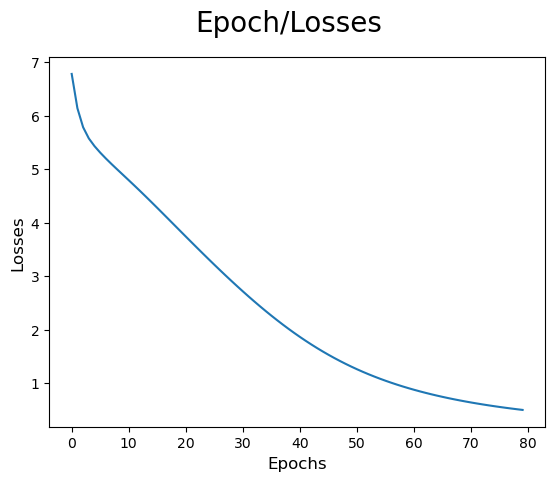

In [54]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

Predict function

In [80]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    
    print(context_idxs)
    preds = forward(context_idxs, theta)
    print(preds[-1])
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [81]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['we', 'are', 'to', 'study'])
print(ix_to_word[22])
print(ix_to_word[27])
print(ix_to_word[24])
print(ix_to_word[5])

[22 27 24  5]
[[ -5.89656327 -10.26451163  -6.35071875  -6.04393068  -7.17544752
   -9.38543073 -10.52236314  -6.97055076  -9.67578844  -9.75898372
   -7.55631968  -8.77832915 -10.33640442  -7.44301794 -10.77839877
   -7.75033657  -8.09425821  -7.81684817  -7.51747467 -12.28922954
  -12.56671165  -5.38134091  -5.69770414  -5.46645189  -8.57640888
   -6.93293838  -7.60397372  -5.16570384  -6.96546746  -9.4005094
   -6.03926659  -8.15555333 -11.69491238  -6.40118892  -9.89369986
   -8.41179341  -0.04452622  -6.91526845 -10.9237203   -6.76670789
   -7.43687719  -5.60337724  -9.43995744]]
we
are
to
study


Accuracy

In [22]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [23]:
accuracy()

1.0

In [24]:
predict(['processes', 'manipulate', 'things', 'study'])

'other'

In [107]:
predict(['are', 'about', 'study', 'the'])

[27 36  5 23]
[[ -5.58031872  -8.08609051  -5.4950218   -6.19373323  -5.51863154
   -6.22247593  -7.60782705  -8.48858658  -5.63537949  -9.54888405
   -6.53265279  -5.91913474  -7.45180532  -8.26961833  -6.97249365
   -6.63303319  -5.86150786  -8.30663117  -6.16232042  -6.02408359
  -10.1843406   -7.09660897  -6.6408728   -5.29405694  -0.14780323
   -5.19434763  -4.56554524  -7.48198212  -5.52888754  -5.48597293
   -8.52947756  -6.84567338  -6.19395519  -5.76595515  -5.29644468
   -5.23779719  -5.92660343  -5.38646372  -5.85050144  -6.73384624
   -3.70326214  -6.94485218  -4.10574868]]


'to'